# Prediction of Credit Card Application Approval

## Import libraries

In [4]:
!pip install opendatasets --upgrade

In [5]:
!pip install scikit-learn

In [6]:
!pip install xgboost

In [7]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [8]:
!pip install --user --upgrade pip

In [9]:
!pip install --upgrade pip

In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn
import opendatasets as od
import pandas as pd
import itertools
from pandas.core.algorithms import value_counts
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#{"username":"ttttaiga","key":"fd2cae41aa1d261ff833f95c952c2cff"}

od.download(
    "https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/versions/3?resource=download")

Skipping, found downloaded files in "./credit-card-approval-prediction" (use force=True to force download)


import opendatasets as od
import pandas as pd
import numpy as np
import os

#data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


#{"username":"ttttaiga","key":"fd2cae41aa1d261ff833f95c952c2cff"}

od.download(
    "https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/versions/3?resource=download")

## Import datasets

In [11]:
application = pd.read_csv("credit-card-approval-prediction/application_record.csv")
credit_record = pd.read_csv("credit-card-approval-prediction/credit_record.csv")

## Check the structure of datasets

In [12]:
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [13]:
credit_record.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [14]:
application.info()
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
application.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000         1.0         0.000000       0.000000   
50%     -1467.000000         1.0         0.000000       0.000000   
75%      -371.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  
count  438557.000000    438557.000000  
mean        0.108207         2.194465  
std         0.310642         0.897207  
min         0.000000         1.000000  
25%         0.000000         2.000000  
50%         0.000000         2.000000  
75%         0.000000         3.000000  
max         1.000000        20.000000

In [16]:
credit_record.describe()

ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00

## Clean datasets

**Check duplicated records**

In [17]:
credit_record.duplicated().sum()

0

In [18]:
application.duplicated().sum()

0

**Check Outliers**

In [19]:
## reference: 
## Kleppen, E. (2022, February 24). How to find outliers using python [step-by-step guide]. 
## CareerFoundry. Retrieved December 14, 2022, 
## from https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/ 

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [20]:
import seaborn as sn

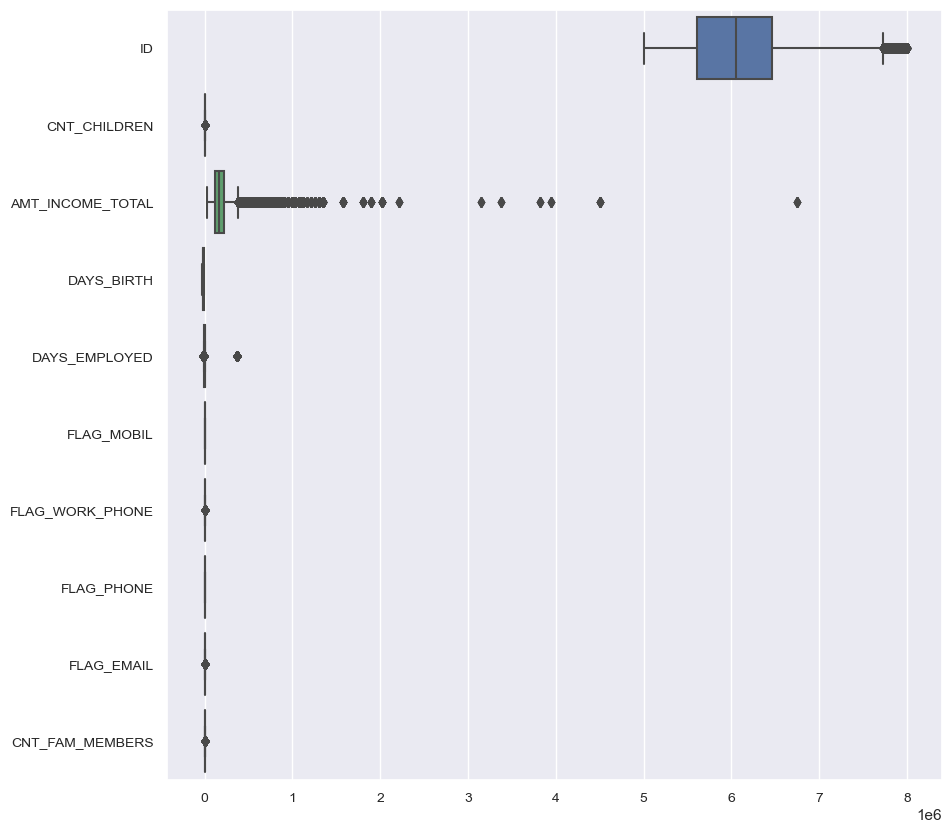

In [21]:
sn.set(rc={"figure.figsize":(10,10)})
sn.boxplot(data= application, orient = "h")
plt.tick_params(axis='both',labelsize=10)

**Check outliers in AMT_INCOME_TOTAL**

In [22]:
outliers = find_outliers_IQR(application.AMT_INCOME_TOTAL)

print('number of outliers: '+ str(len(outliers)))

percentage = len(outliers) / application.AMT_INCOME_TOTAL.shape[0]
print('percentage of outliers: ' + str(round(percentage * 100 ,2)) + '%')

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 19108
percentage of outliers: 4.36%
max outlier value: 6750000.0
min outlier value: 382500.0


**Since outliers counts a small portion of the total data volume, we decide to drop outliers**

In [23]:
application = application.drop(outliers.index)

In [24]:
application.shape[0]

419449

**Check missing values**

In [25]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        129662
CNT_FAM_MEMBERS             0
dtype: int64

**Check the percentage of missing values**

In [26]:
percentage = round(application.isnull().sum() / application.shape[0] * 100, 2)
percentage

ID                      0.00
CODE_GENDER             0.00
FLAG_OWN_CAR            0.00
FLAG_OWN_REALTY         0.00
CNT_CHILDREN            0.00
AMT_INCOME_TOTAL        0.00
NAME_INCOME_TYPE        0.00
NAME_EDUCATION_TYPE     0.00
NAME_FAMILY_STATUS      0.00
NAME_HOUSING_TYPE       0.00
DAYS_BIRTH              0.00
DAYS_EMPLOYED           0.00
FLAG_MOBIL              0.00
FLAG_WORK_PHONE         0.00
FLAG_PHONE              0.00
FLAG_EMAIL              0.00
OCCUPATION_TYPE        30.91
CNT_FAM_MEMBERS         0.00
dtype: float64

**Replace Null values in 'OCCUPATION_TYPE with 'Unknown'**

In [27]:
application["OCCUPATION_TYPE"].fillna("Unknown", inplace = True)

**Replace 'DAYS_BIRTH' and 'DAYS_EMPLOYED'**

In [28]:
application['Age'] = application.apply(lambda x: abs(x['DAYS_BIRTH']/365),axis=1)

In [29]:
application['Days of Employed'] = application.apply(lambda x: abs(x['DAYS_EMPLOYED']),axis=1)

In [30]:
application = application.drop(columns=["DAYS_BIRTH", "DAYS_EMPLOYED"])

In [31]:
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   
5  5008810           F            N               Y             0   
6  5008811           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   
5          270000.0  Commercial associate  Secondary / secondary special   
6          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   
5  Single / not married  House / apartment           1                0   
6  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS        Age  \
2           0           0  Security staff              2.0  58.832877   
3           1           1     Sales staff              1.0  52.356164   
4           1           1     Sales staff              1.0  52.356164   
5           1           1     Sales staff              1.0  52.356164   
6           1           1     Sales staff              1.0  52.356164   

   Days of Employed  
2              1134  
3              3051  
4              3051  
5              3051  
6              3051

**Find common IDs in both files**

In [32]:
len(application['ID'].unique())

419410

In [33]:
len(credit_record['ID'].unique())

45985

In [34]:
len(set(application['ID']).intersection(set(credit_record['ID'])))

34928

**Create response variable**

In [35]:
credit_group = pd.get_dummies(data=credit_record,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(credit_record['STATUS'].unique().tolist())].sum()
credit_group.head()

0  1  2  3  4  5  C   X
ID                               
5001711   3  0  0  0  0  0  0   1
5001712  10  0  0  0  0  0  9   0
5001713   0  0  0  0  0  0  0  22
5001714   0  0  0  0  0  0  0  15
5001715   0  0  0  0  0  0  0  60

In [36]:
credit_group['number_of_months']=credit_record.groupby('ID')['MONTHS_BALANCE'].count()
credit_group['over_60']=credit_group[['2','3','4','5']].sum(axis=1)
credit_group['less_60']=credit_group[['0','1']].sum(axis=1)
credit_group['overall_pastdue']=credit_group[['0','1','2','3','4','5']].sum(axis=1)
credit_group['paid_percent']=credit_group['C']/(credit_group['C']+ credit_group['overall_pastdue'])
credit_group.head()

0  1  2  3  4  5  C   X  number_of_months  over_60  less_60  \
ID                                                                      
5001711   3  0  0  0  0  0  0   1                 4        0        3   
5001712  10  0  0  0  0  0  9   0                19        0       10   
5001713   0  0  0  0  0  0  0  22                22        0        0   
5001714   0  0  0  0  0  0  0  15                15        0        0   
5001715   0  0  0  0  0  0  0  60                60        0        0   

         overall_pastdue  paid_percent  
ID                                      
5001711                3      0.000000  
5001712               10      0.473684  
5001713                0           NaN  
5001714                0           NaN  
5001715                0           NaN

In [37]:
credit_group=credit_group.rename(columns=
                      {'0':'pastdue_1_29',
                       '1':'pastdue_30_59',
                       '2':'pastdue_60_89',
                       '3':'pastdue_90_119',
                       '4':'pastdue_120_149',
                       '5':'pastdue_over_150',
                       'C':'paid_off',
                       'X':'no_loan',
                      })

In [38]:
target=[]
for index,row in credit_group.iterrows() :
  if row['paid_percent'] ==1 or (row ['no_loan']==row['number_of_months']) :
    target.append(1)
  elif row['over_60'] ==0 :
    target.append(1)
  else:
    target.append(0)

credit_group['good_or_bad']=target
credit_group['good_or_bad'].value_counts()

1    45318
0      667
Name: good_or_bad, dtype: int64

**Merge the files**

In [39]:
credit_group.head()

pastdue_1_29  pastdue_30_59  pastdue_60_89  pastdue_90_119  \
ID                                                                    
5001711             3              0              0               0   
5001712            10              0              0               0   
5001713             0              0              0               0   
5001714             0              0              0               0   
5001715             0              0              0               0   

         pastdue_120_149  pastdue_over_150  paid_off  no_loan  \
ID                                                              
5001711                0                 0         0        1   
5001712                0                 0         9        0   
5001713                0                 0         0       22   
5001714                0                 0         0       15   
5001715                0                 0         0       60   

         number_of_months  over_60  less_60  overall_pastdue  paid_percent  \
ID                                                                           
5001711                 4        0        3                3      0.000000   
5001712                19        0       10               10      0.473684   
5001713                22        0        0                0           NaN   
5001714                15        0        0                0           NaN   
5001715                60        0        0                0           NaN   

         good_or_bad  
ID                    
5001711            1  
5001712            1  
5001713            1  
5001714            1  
5001715            1

In [40]:
features=['number_of_months','good_or_bad']
most_important_features = credit_group.loc[:,features]
df=pd.merge(application,most_important_features,on='ID')

In [41]:
len(df['ID'].unique())

34928

In [42]:
df.index=df['ID']
df=df.drop('ID',axis=1)
df.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
ID                                                               
5008806           M            Y               Y             0   
5008808           F            N               Y             0   
5008809           F            N               Y             0   
5008810           F            N               Y             0   
5008811           F            N               Y             0   

         AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
ID                                                
5008806          112500.0               Working   
5008808          270000.0  Commercial associate   
5008809          270000.0  Commercial associate   
5008810          270000.0  Commercial associate   
5008811          270000.0  Commercial associate   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
ID                                                             
5008806  Secondary / secondary special               Married   
5008808  Secondary / secondary special  Single / not married   
5008809  Secondary / secondary special  Single / not married   
5008810  Secondary / secondary special  Single / not married   
5008811  Secondary / secondary special  Single / not married   

         NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
ID                                                                    
5008806  House / apartment           1                0           0   
5008808  House / apartment           1                0           1   
5008809  House / apartment           1                0           1   
5008810  House / apartment           1                0           1   
5008811  House / apartment           1                0           1   

         FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS        Age  \
ID                                                                
5008806           0  Security staff              2.0  58.832877   
5008808           1     Sales staff              1.0  52.356164   
5008809           1     Sales staff              1.0  52.356164   
5008810           1     Sales staff              1.0  52.356164   
5008811           1     Sales staff              1.0  52.356164   

         Days of Employed  number_of_months  good_or_bad  
ID                                                        
5008806              1134                30            1  
5008808              3051                 5            1  
5008809              3051                 5            1  
5008810              3051                27            1  
5008811              3051                39            1

**Encode categorical variable**

In [43]:
df['GENDER'] = df['CODE_GENDER'].replace(['F','M'],[0,1])
df['CAR'] = df['FLAG_OWN_CAR'].replace(['Y','N'],[1,0])
df['REALTY'] = df['FLAG_OWN_REALTY'].replace(['Y','N'],[1,0])

In [44]:
df = df.drop(columns=['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY'])
df.head()

CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
ID                                                              
5008806             0          112500.0               Working   
5008808             0          270000.0  Commercial associate   
5008809             0          270000.0  Commercial associate   
5008810             0          270000.0  Commercial associate   
5008811             0          270000.0  Commercial associate   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
ID                                                             
5008806  Secondary / secondary special               Married   
5008808  Secondary / secondary special  Single / not married   
5008809  Secondary / secondary special  Single / not married   
5008810  Secondary / secondary special  Single / not married   
5008811  Secondary / secondary special  Single / not married   

         NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
ID                                                                    
5008806  House / apartment           1                0           0   
5008808  House / apartment           1                0           1   
5008809  House / apartment           1                0           1   
5008810  House / apartment           1                0           1   
5008811  House / apartment           1                0           1   

         FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS        Age  \
ID                                                                
5008806           0  Security staff              2.0  58.832877   
5008808           1     Sales staff              1.0  52.356164   
5008809           1     Sales staff              1.0  52.356164   
5008810           1     Sales staff              1.0  52.356164   
5008811           1     Sales staff              1.0  52.356164   

         Days of Employed  number_of_months  good_or_bad  GENDER  CAR  REALTY  
ID                                                                             
5008806              1134                30            1       1    1       1  
5008808              3051                 5            1       0    0       1  
5008809              3051                 5            1       0    0       1  
5008810              3051                27            1       0    0       1  
5008811              3051                39            1       0    0       1

**Rename variables**

In [45]:
df.rename(columns={'CNT_CHILDREN':'child_number','AMT_INCOME_TOTAL':'income',
                         'NAME_EDUCATION_TYPE':'edu_level','NAME_FAMILY_STATUS':'marital',
                        'NAME_HOUSING_TYPE':'house_type','FLAG_EMAIL':'email','FLAG_MOBIL':'mobil',
                         'NAME_INCOME_TYPE':'income_type','FLAG_WORK_PHONE':'work_phone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'fam_size','Days of Employed':'days_employeed',
                        'OCCUPATION_TYPE':'occupation','Age':'age','GENDER':'gender','CAR':'car','REALTY':'reality',
                        },inplace=True)
df.head()

child_number    income           income_type  \
ID                                                      
5008806             0  112500.0               Working   
5008808             0  270000.0  Commercial associate   
5008809             0  270000.0  Commercial associate   
5008810             0  270000.0  Commercial associate   
5008811             0  270000.0  Commercial associate   

                             edu_level               marital  \
ID                                                             
5008806  Secondary / secondary special               Married   
5008808  Secondary / secondary special  Single / not married   
5008809  Secondary / secondary special  Single / not married   
5008810  Secondary / secondary special  Single / not married   
5008811  Secondary / secondary special  Single / not married   

                house_type  mobil  work_phone  phone  email      occupation  \
ID                                                                            
5008806  House / apartment      1           0      0      0  Security staff   
5008808  House / apartment      1           0      1      1     Sales staff   
5008809  House / apartment      1           0      1      1     Sales staff   
5008810  House / apartment      1           0      1      1     Sales staff   
5008811  House / apartment      1           0      1      1     Sales staff   

         fam_size        age  days_employeed  number_of_months  good_or_bad  \
ID                                                                            
5008806       2.0  58.832877            1134                30            1   
5008808       1.0  52.356164            3051                 5            1   
5008809       1.0  52.356164            3051                 5            1   
5008810       1.0  52.356164            3051                27            1   
5008811       1.0  52.356164            3051                39            1   

         gender  car  reality  
ID                             
5008806       1    1        1  
5008808       0    0        1  
5008809       0    0        1  
5008810       0    0        1  
5008811       0    0        1

**Delete 'mobil' variable**

In [46]:
df.mobil.value_counts()

1    34928
Name: mobil, dtype: int64

In [47]:
df = df.drop(columns=["mobil"])

**Encode categorical variable**

In [48]:
categorical_df=df.select_dtypes('object')
categorical_df.nunique()

income_type     5
edu_level       5
marital         5
house_type      6
occupation     19
dtype: int64

In [49]:
df.income_type.value_counts()

Working                 18146
Commercial associate     7898
Pensioner                6064
State servant            2809
Student                    11
Name: income_type, dtype: int64

In [50]:
df.edu_level.value_counts()

Secondary / secondary special    24167
Higher education                  9004
Incomplete higher                 1352
Lower secondary                    374
Academic degree                     31
Name: edu_level, dtype: int64

In [51]:
df.marital.value_counts()

Married                 23915
Single / not married     4630
Civil marriage           2870
Separated                2014
Widow                    1499
Name: marital, dtype: int64

In [52]:
df.house_type.value_counts()

House / apartment      31178
With parents            1715
Municipal apartment     1098
Rented apartment         541
Office apartment         235
Co-op apartment          161
Name: house_type, dtype: int64

In [53]:
df.occupation.value_counts()

Unknown                  10939
Laborers                  6119
Core staff                3421
Sales staff               3386
Managers                  2499
Drivers                   2055
High skill tech staff     1349
Medicine staff            1188
Accountants               1176
Cooking staff              646
Security staff             564
Cleaning staff             547
Private service staff      330
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                147
HR staff                    81
Realty agents               79
IT staff                    53
Name: occupation, dtype: int64

**Define convert_dummy function**

In [54]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    df=df.join(pos)
    return df

In [55]:
df.loc[(df['occupation']=='Cleaning staff') | (df['occupation']=='Cooking staff') | (df['occupation']=='Drivers') | (df['occupation']=='Laborers') | (df['occupation']=='Low-skill Laborers') | (df['occupation']=='Security staff') | (df['occupation']=='Waiters/barmen staff'),'occupation']='Laborwk'
df.loc[(df['occupation']=='Accountants') | (df['occupation']=='Core staff') | (df['occupation']=='HR staff') | (df['occupation']=='Medicine staff') | (df['occupation']=='Private service staff') | (df['occupation']=='Realty agents') | (df['occupation']=='Sales staff') | (df['occupation']=='Secretaries'),'occupation']='officewk'
df.loc[(df['occupation']=='Managers') | (df['occupation']=='High skill tech staff') | (df['occupation']=='IT staff'),'occupation']='hightecwk'
df.loc[(df['occupation']=='Unemployeed'),'occupation'] = 'Umployeed'

In [56]:
df = convert_dummy(df,'occupation')
df = convert_dummy(df,'house_type')
df.loc[df['edu_level']=='Academic degree','edu_level']='Higher education'
df = convert_dummy(df,'edu_level')
df = convert_dummy(df,'marital')
df.loc[df['income_type']=='Student','income_type']='State servant'
df = convert_dummy(df,'income_type')
df = df.drop(columns=['occupation','house_type','edu_level','marital','income_type'])
df.head()

child_number    income  work_phone  phone  email  fam_size  \
ID                                                                    
5008806             0  112500.0           0      0      0       2.0   
5008808             0  270000.0           0      1      1       1.0   
5008809             0  270000.0           0      1      1       1.0   
5008810             0  270000.0           0      1      1       1.0   
5008811             0  270000.0           0      1      1       1.0   

               age  days_employeed  number_of_months  good_or_bad  ...  \
ID                                                                 ...   
5008806  58.832877            1134                30            1  ...   
5008808  52.356164            3051                 5            1  ...   
5008809  52.356164            3051                 5            1  ...   
5008810  52.356164            3051                27            1  ...   
5008811  52.356164            3051                39            1  ...   

         edu_level_Secondary / secondary special  marital_Civil marriage  \
ID                                                                         
5008806                                        1                       0   
5008808                                        1                       0   
5008809                                        1                       0   
5008810                                        1                       0   
5008811                                        1                       0   

         marital_Married  marital_Separated  marital_Single / not married  \
ID                                                                          
5008806                1                  0                             0   
5008808                0                  0                             1   
5008809                0                  0                             1   
5008810                0                  0                             1   
5008811                0                  0                             1   

         marital_Widow  income_type_Commercial associate  \
ID                                                         
5008806              0                                 0   
5008808              0                                 1   
5008809              0                                 1   
5008810              0                                 1   
5008811              0                                 1   

         income_type_Pensioner  income_type_State servant  income_type_Working  
ID                                                                              
5008806                      0                          0                    1  
5008808                      0                          0                    0  
5008809                      0                          0                    0  
5008810                      0                          0                    0  
5008811                      0                          0                    0  

[5 rows x 36 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34928 entries, 5008806 to 5150337
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   child_number                             34928 non-null  int64  
 1   income                                   34928 non-null  float64
 2   work_phone                               34928 non-null  int64  
 3   phone                                    34928 non-null  int64  
 4   email                                    34928 non-null  int64  
 5   fam_size                                 34928 non-null  float64
 6   age                                      34928 non-null  float64
 7   days_employeed                           34928 non-null  int64  
 8   number_of_months                         34928 non-null  int64  
 9   good_or_bad                              34928 non-null  int64  
 10  gender                                

## EDA

**Correlation Matrix and Plot**

**TOP 5 Most Correlated variables with the Dependent Variable "good_or_bad"**

In [58]:
corr_matrix = df.corr()
top5 = corr_matrix['good_or_bad'].sort_values(ascending=False).head(5)
print(top5)

good_or_bad                  1.000000
reality                      0.020183
marital_Married              0.012740
income_type_State servant    0.009373
occupation_officewk          0.008970
Name: good_or_bad, dtype: float64


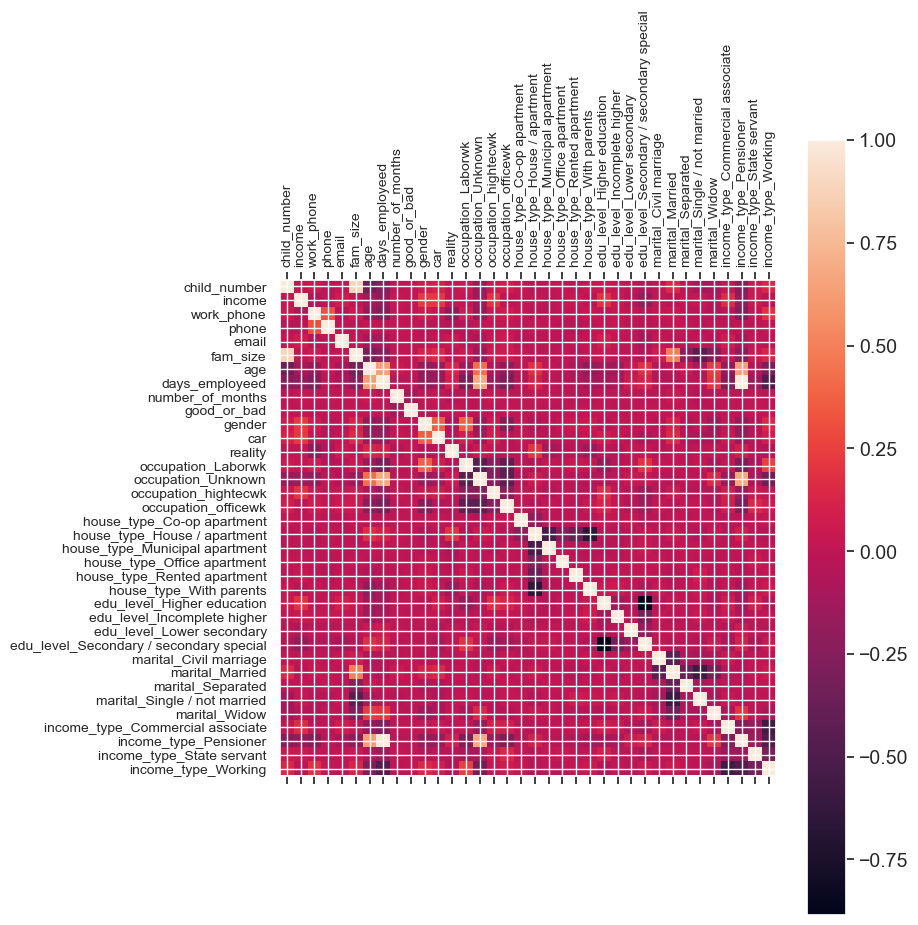

In [59]:
f = plt.figure(figsize=(8, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

**Boxplot**

<AxesSubplot:xlabel='good_or_bad', ylabel='income'>

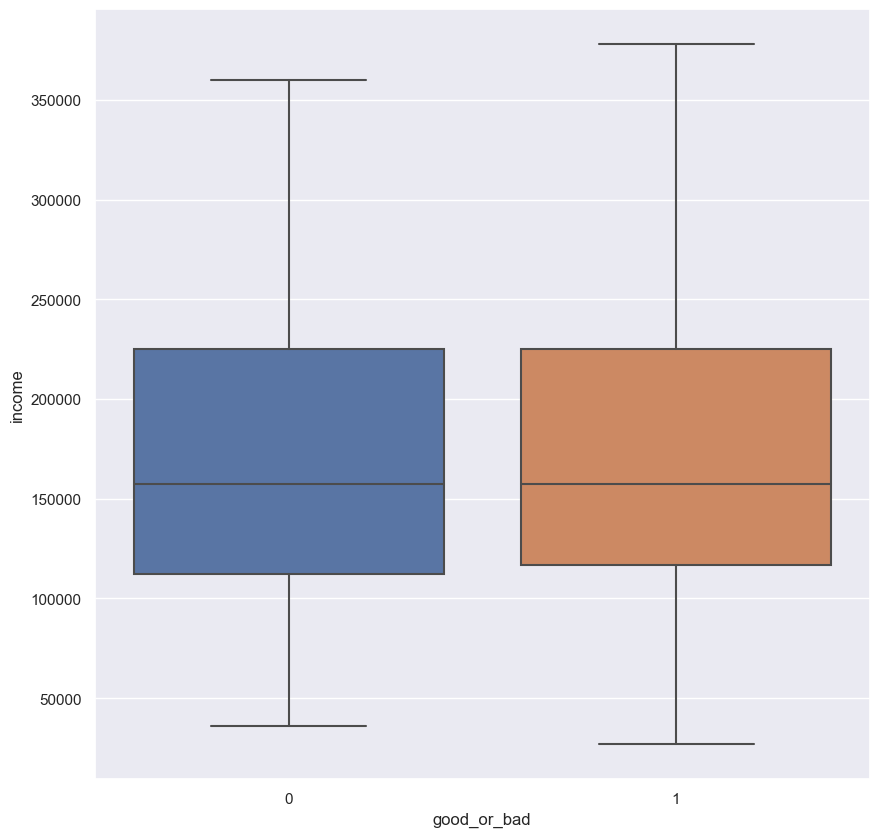

In [60]:
sn.boxplot(x='good_or_bad', y='income', data=df)

**Number of months boxplot**

<AxesSubplot:xlabel='good_or_bad', ylabel='number_of_months'>

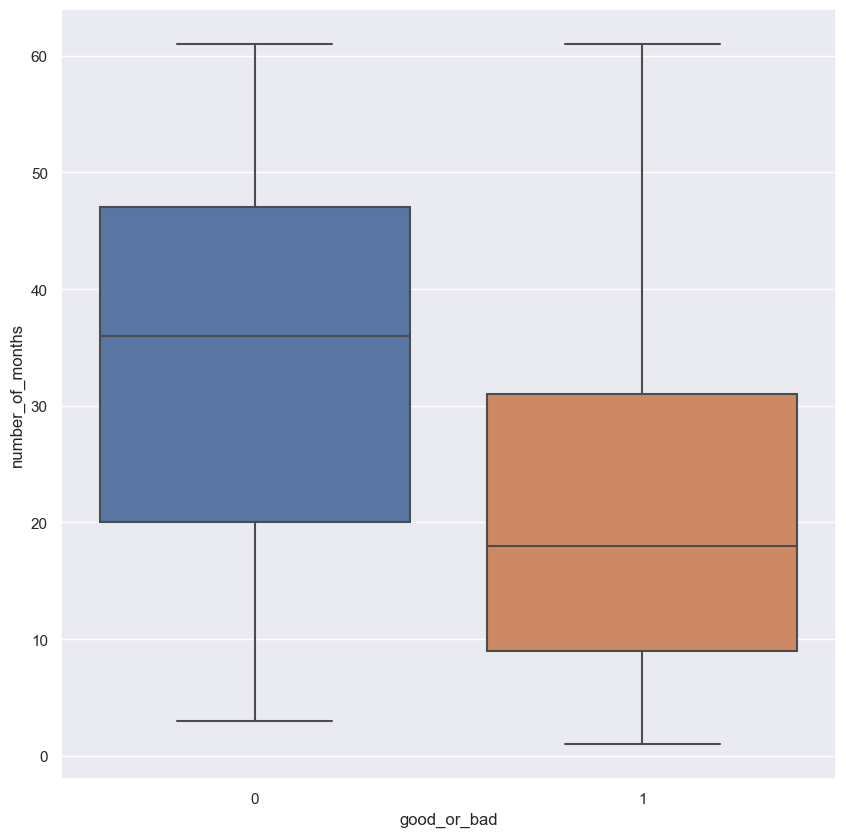

In [61]:
sn.boxplot(x='good_or_bad', y='number_of_months', data=df)


## Models

**define function to calculate confusion matrix**

In [62]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

**Import packages for ROC/AUC curve**

In [63]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

**Define Fuction to draw Confusion Matrix**

In [64]:
import seaborn as sns
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Split the dataset into testset and trainset**

In [65]:
df1=df[df['good_or_bad']==0]

In [66]:
df2=df[df['good_or_bad']==1]
bad_frac = len(df1)/len(df)
print("bad customer portion: ", round(bad_frac*100 , 2), "%")

bad customer portion:  1.68 %


In [67]:
df3=df2.sample(frac = bad_frac)

In [68]:
df4=pd.concat([df1, df3])

In [69]:
X = df4.drop('good_or_bad', axis=1)
y = df4['good_or_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,)

**Decision Tree**

In [70]:
y_train.value_counts()

1    417
0    399
Name: good_or_bad, dtype: int64

In [71]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

In [73]:
model = DecisionTreeClassifier(criterion="entropy", max_depth= 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_metrics (pd.DataFrame(confusion_matrix(y_test,y_pred)))

True Positives: 118
True Negatives: 104
False Positives: 43
False Negatives: 85
--------------------------------------------------
Accuracy: 0.63
Mis-Classification: 0.37
Sensitivity: 0.58
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.64


In [74]:
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_pred)
print(f'test roc_auc_score = {roc_auc_score(y_test,y_pred)}')

test roc_auc_score = 0.6415919024614677


**Decision Tree Graph**

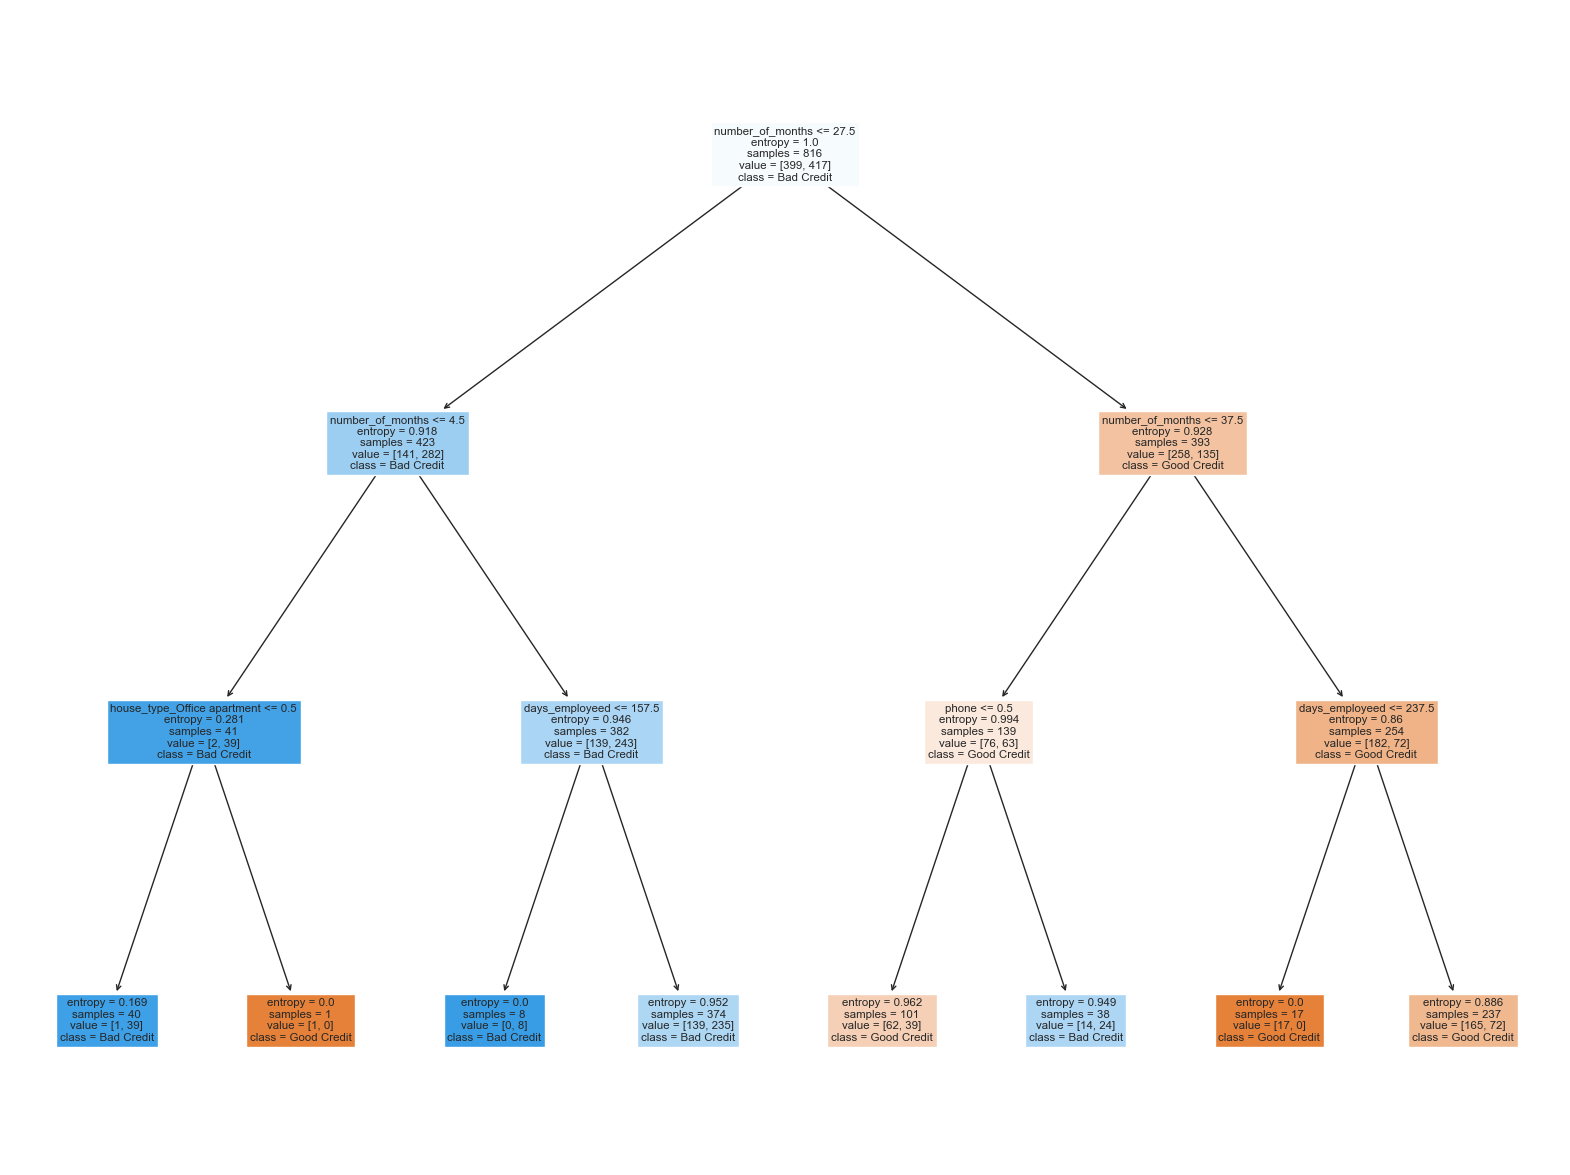

In [75]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model, 
                   feature_names= X_train.columns.values.tolist(),  
                   class_names= ["Good Credit","Bad Credit"],
                   filled=True)

[[0.55026455 0.44973545]
 [0.26708075 0.73291925]]


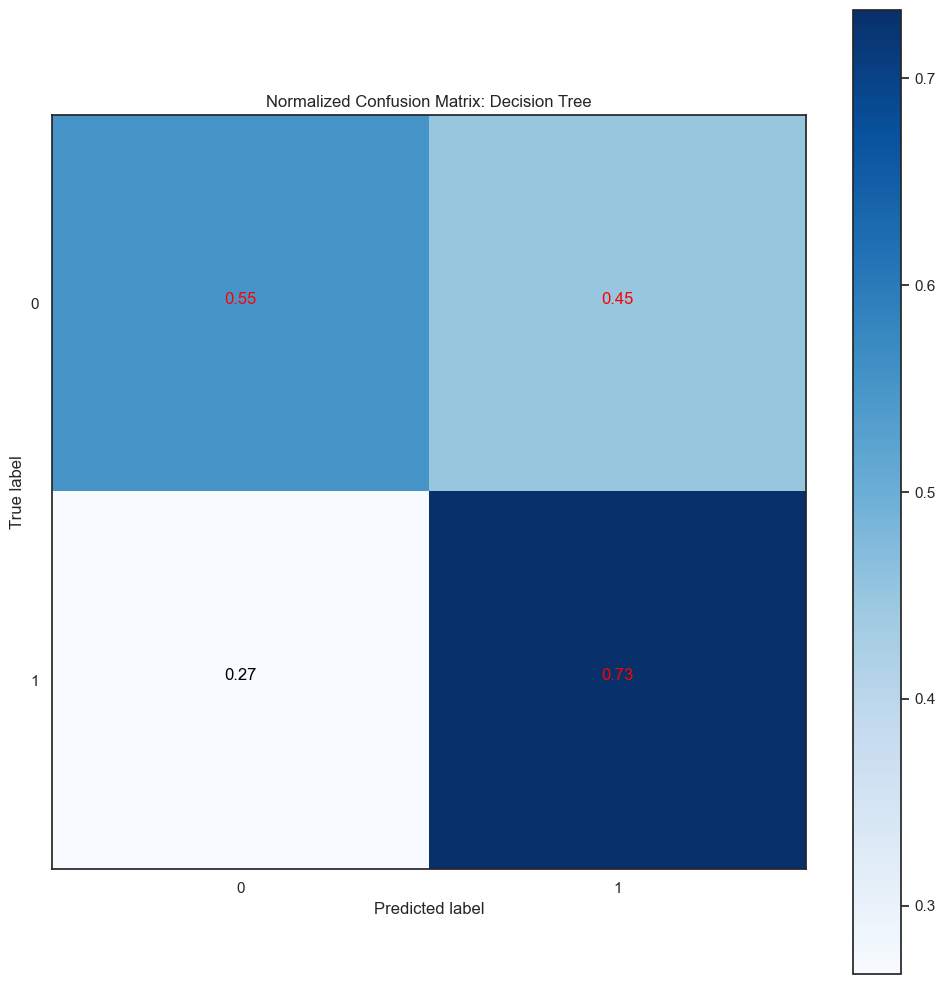

In [76]:
sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Decision Tree')

**ROC/AUC curve**

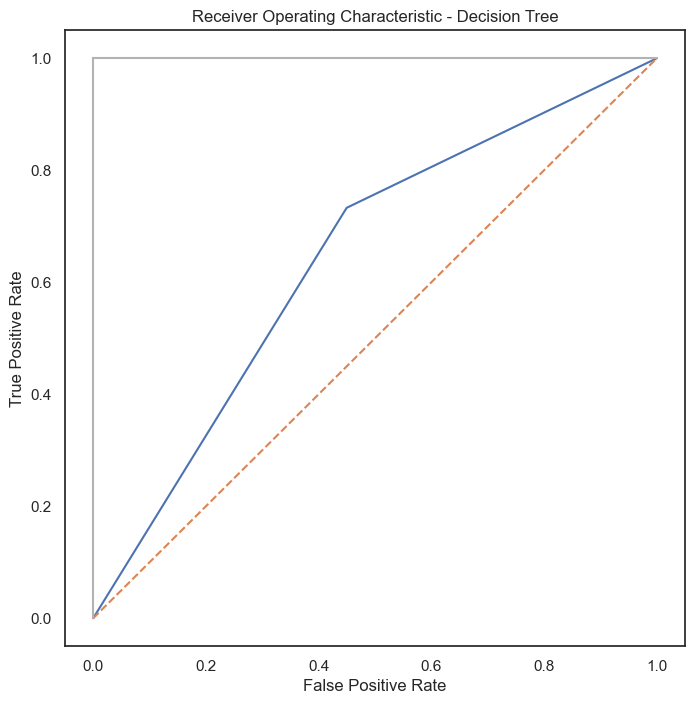

In [77]:
plt.subplots(1, figsize=(8,8))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Xgboost**

In [78]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred)))
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

Accuracy Score is 0.68857
     0    1
0  122   67
1   42  119


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

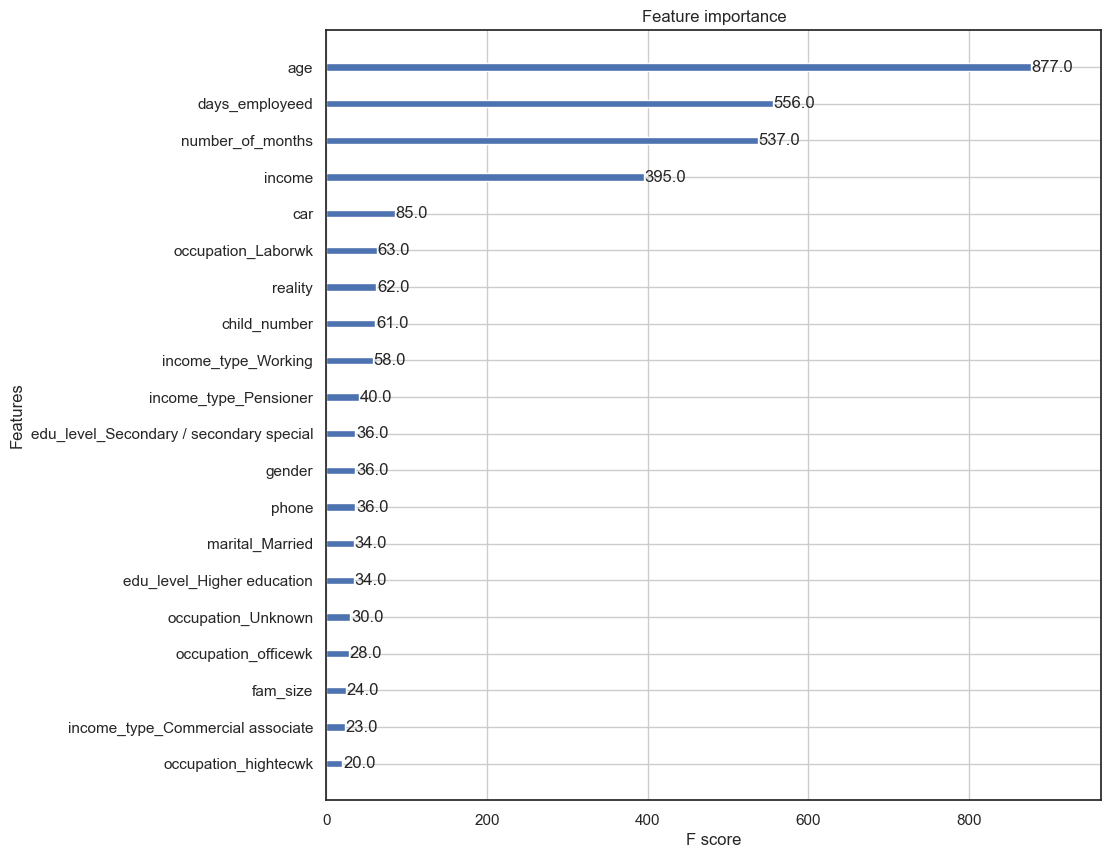

In [79]:
xgb.plot_importance(model, max_num_features=20)

In [80]:
confusion_metrics (pd.DataFrame(confusion_matrix(y_test,y_pred)))

True Positives: 119
True Negatives: 122
False Positives: 42
False Negatives: 67
--------------------------------------------------
Accuracy: 0.69
Mis-Classification: 0.31
Sensitivity: 0.64
Specificity: 0.74
Precision: 0.74
f_1 Score: 0.69


[[0.64550265 0.35449735]
 [0.26086957 0.73913043]]


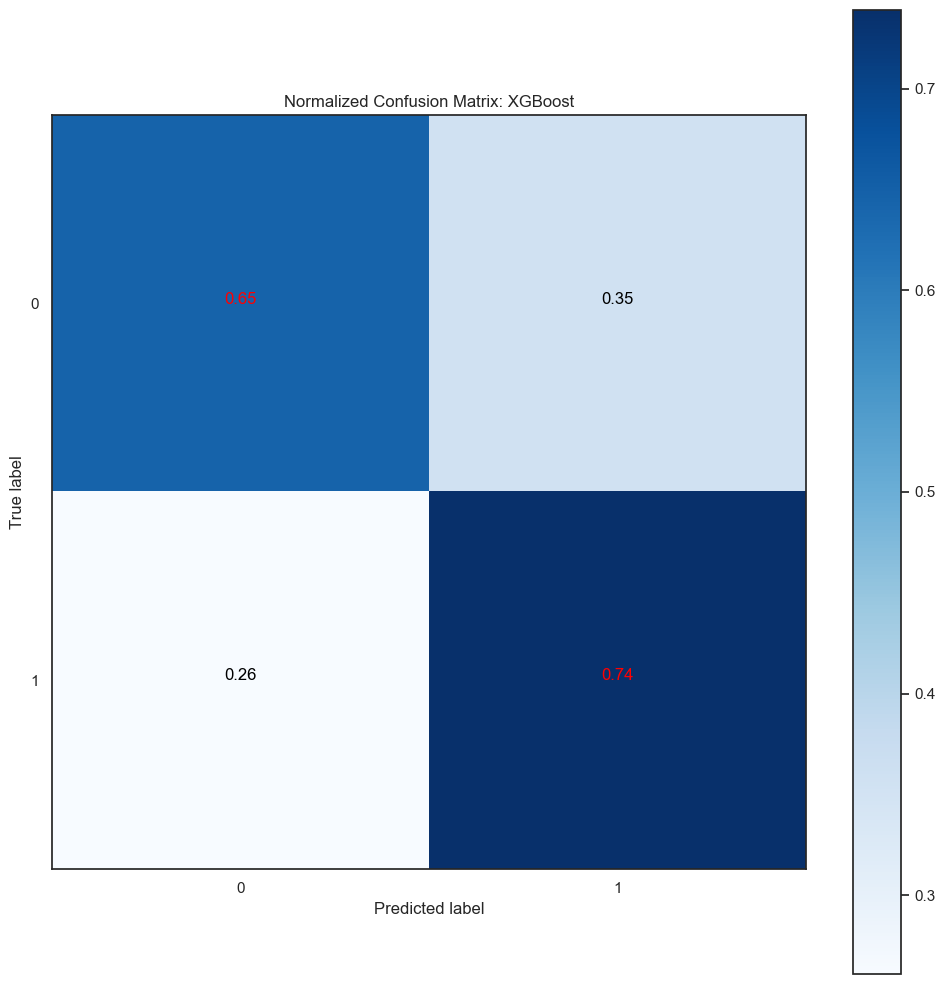

In [81]:
sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: XGBoost')

In [82]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_pred)

In [83]:
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, y_pred))

roc_auc_score for XGBoost:  0.6923165401426271


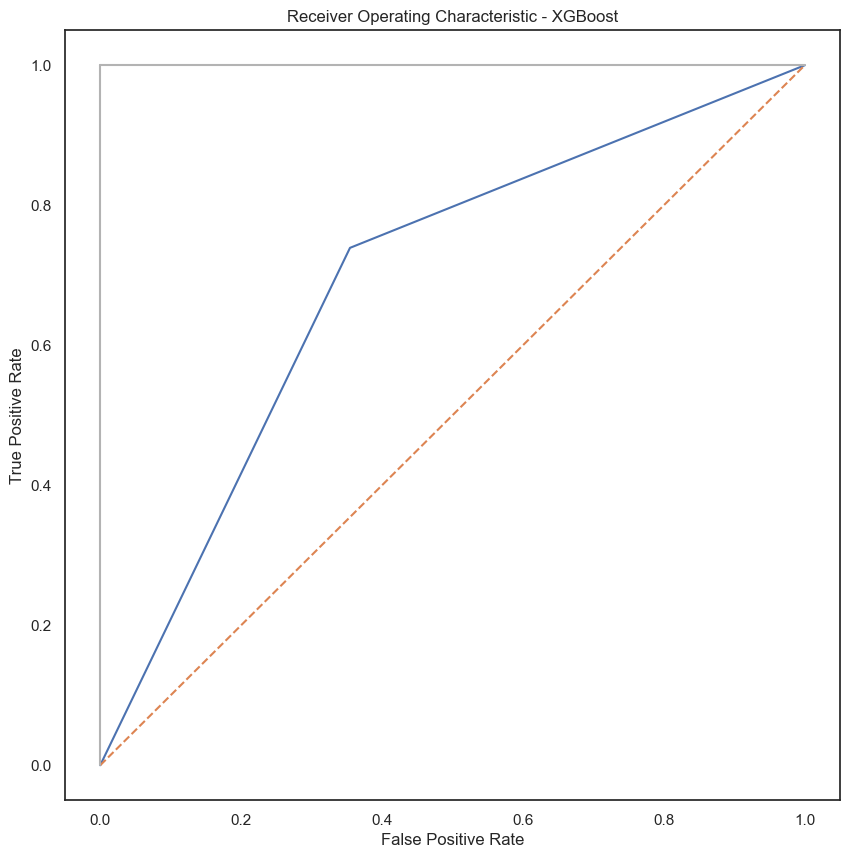

In [84]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Logistic Regression**

In [85]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


**Split Our original Dataset**

In [86]:
X = df4.drop('good_or_bad', axis=1)
y = df4['good_or_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,)

**Define Logistic Regression**

In [87]:
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space=dict()
space['solver']=['newton-cg','lbfgs','liblinear']
space['penalty']=['none','l1','l2','elasticnet']
space['C']=[1e-5,0.1e-4,1e-3,1e-2,1e-1,1,10,100]
#define search
search=GridSearchCV(model,space,scoring='accuracy',n_jobs=-1,cv=cv)
#excute search
result=search.fit(X_train,y_train)


/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/ana

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_lo

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not conv

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The 

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not conv

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.p

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupen

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupen

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupen

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/si

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The li

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/si

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupen

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupen

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The li

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The 

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

In [88]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6577687443541103
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Accuracy Score is 0.67143
     0    1
0  118   71
1   44  117
[[0.62433862 0.37566138]
 [0.27329193 0.72670807]]


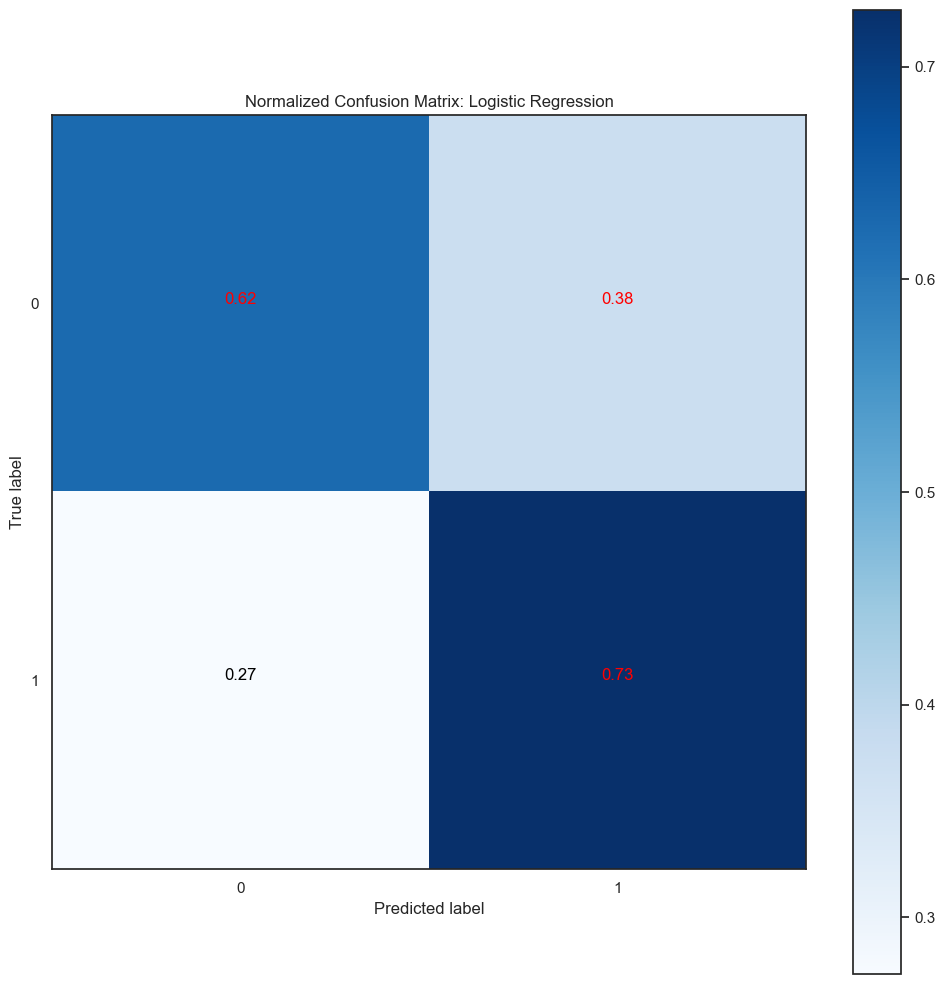

In [89]:
model = LogisticRegression(C=1,
                           random_state=0,
                           solver='liblinear',penalty='l1')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

In [90]:
print('intercept ', model.intercept_[0])
print('classes', model.classes_)
pd.DataFrame({'coeff': model.coef_[0]}, 
             index=X.columns)

intercept  0.8439398380731
classes [0 1]


coeff
child_number                             0.000000
income                                  -0.000001
work_phone                               0.081814
phone                                    0.175838
email                                    0.000297
fam_size                                -0.068576
age                                      0.001865
days_employeed                           0.000006
number_of_months                        -0.048111
gender                                  -0.008072
car                                      0.200557
reality                                  0.184474
occupation_Laborwk                      -0.247286
occupation_Unknown                       0.063549
occupation_hightecwk                     0.240298
occupation_officewk                      0.000000
house_type_Co-op apartment               0.362428
house_type_House / apartment             0.362076
house_type_Municipal apartment           0.000000
house_type_Office apartment              0.000000
house_type_Rented apartment              0.000000
house_type_With parents                  0.271129
edu_level_Higher education               0.000000
edu_level_Incomplete higher              0.000000
edu_level_Lower secondary                0.000000
edu_level_Secondary / secondary special  0.259597
marital_Civil marriage                   0.000000
marital_Married                          0.209625
marital_Separated                        0.081106
marital_Single / not married             0.000000
marital_Widow                           -0.380241
income_type_Commercial associate         0.000000
income_type_Pensioner                   -2.451810
income_type_State servant                0.249038
income_type_Working                      0.000000

In [91]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.596860
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            good_or_bad   No. Observations:                  816
Model:                          Logit   Df Residuals:                      785
Method:                           MLE   Df Model:                           30
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.1386
Time:                        22:33:37   Log-Likelihood:                -487.04
converged:                       True   LL-Null:                       -565.41
Covariance Type:            nonrobust   LLR p-value:                 4.222e-19
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
child_number                                0.228

In [92]:
log_reg = sm.Logit(y_train, X_train).fit()
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
 
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Optimization terminated successfully.
         Current function value: 0.596860
         Iterations 12
Confusion Matrix : 
 [[113  76]
 [ 47 114]]
Test accuracy =  0.6485714285714286


In [93]:
X1 = df4[['days_employeed','number_of_months','car','reality']]
y1 = df4['good_or_bad']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42,)

In [94]:
logit_model1=sm.Logit(y_train,X_train)
result1=logit_model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.596860
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            good_or_bad   No. Observations:                  816
Model:                          Logit   Df Residuals:                      785
Method:                           MLE   Df Model:                           30
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.1386
Time:                        22:34:18   Log-Likelihood:                -487.04
converged:                       True   LL-Null:                       -565.41
Covariance Type:            nonrobust   LLR p-value:                 4.222e-19
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
child_number                                0.228

In [95]:
log_reg = sm.Logit(y_train, X_train).fit()
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
 
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Optimization terminated successfully.
         Current function value: 0.596860
         Iterations 12
Confusion Matrix : 
 [[113  76]
 [ 47 114]]
Test accuracy =  0.6485714285714286


**Split our filtered dataset**

In [97]:
X1 = df4[['days_employeed','number_of_months','car','reality']]
y1 = df4['good_or_bad']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42,)

In [98]:
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space=dict()
space['solver']=['newton-cg','lbfgs','liblinear']
space['penalty']=['none','l1','l2','elasticnet']
space['C']=[1e-5,0.1e-4,1e-3,1e-2,1e-1,1,10,100]
#define search
search=GridSearchCV(model,space,scoring='accuracy',n_jobs=-1,cv=cv)
#excute search
result=search.fit(X1_train,y1_train)


/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the 

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not conv

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupen

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The 

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The 

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupen

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not conv

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The 

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesear

/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/yupengshen/opt/ana

In [99]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6569507176553248
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Accuracy Score is 0.63143
     0    1
0  111   78
1   51  110
[[0.58730159 0.41269841]
 [0.31677019 0.68322981]]


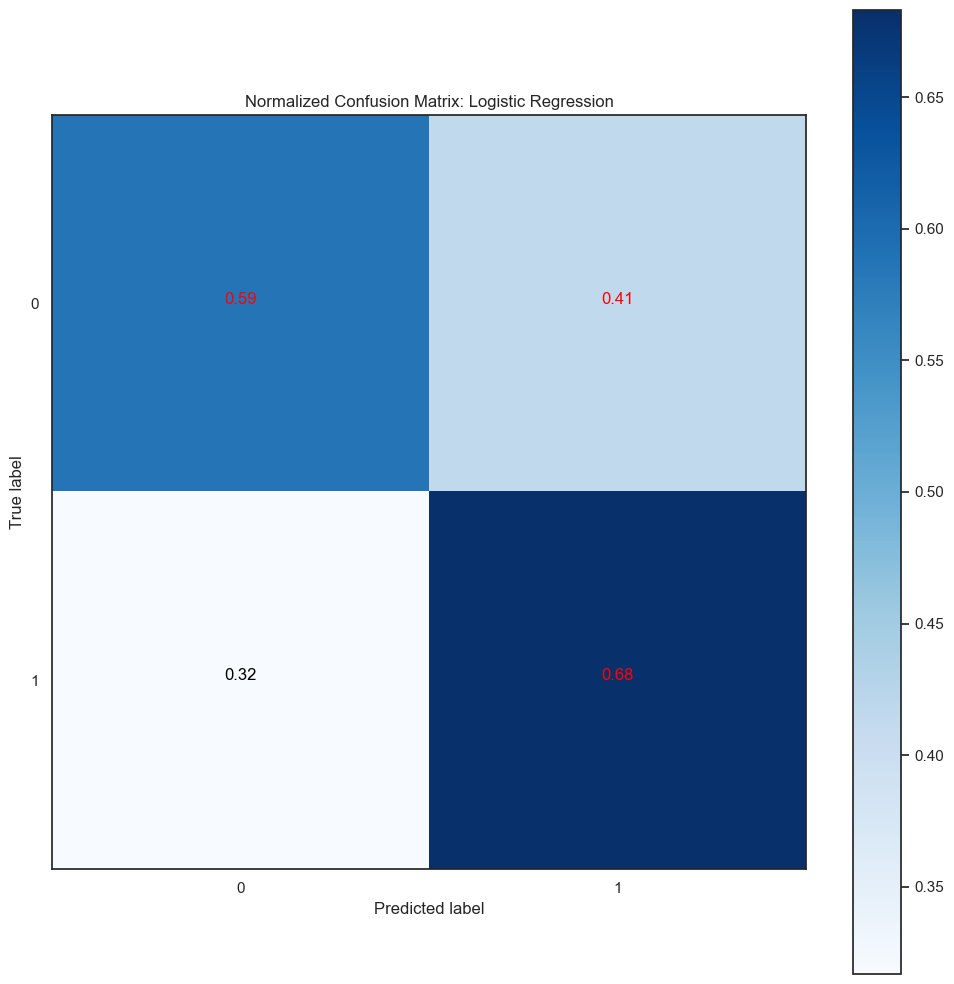

In [101]:
model = LogisticRegression(C=0.1,
                           random_state=0,
                           solver='liblinear', penalty= 'l1')
model.fit(X1_train, y1_train)
y1_predict = model.predict(X1_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y1_test, y1_predict)))
print(pd.DataFrame(confusion_matrix(y1_test,y1_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y1_test,y1_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

In [102]:
print('intercept ', model.intercept_[0])
print('classes', model.classes_)
pd.DataFrame({'coeff': model.coef_[0]}, 
             index=X1.columns)

intercept  1.0746648356725608
classes [0 1]


coeff
days_employeed   -2.616345e-07
number_of_months -4.124522e-02
car               2.556372e-02
reality           9.421791e-02

In [103]:
confusion_metrics (pd.DataFrame(confusion_matrix(y1_test,y1_predict)))

True Positives: 110
True Negatives: 111
False Positives: 51
False Negatives: 78
--------------------------------------------------
Accuracy: 0.63
Mis-Classification: 0.37
Sensitivity: 0.59
Specificity: 0.69
Precision: 0.69
f_1 Score: 0.63


In [104]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_predict)

In [106]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y1_test, y1_predict))

roc_auc_score for Logistic Regression:  0.6352657004830917


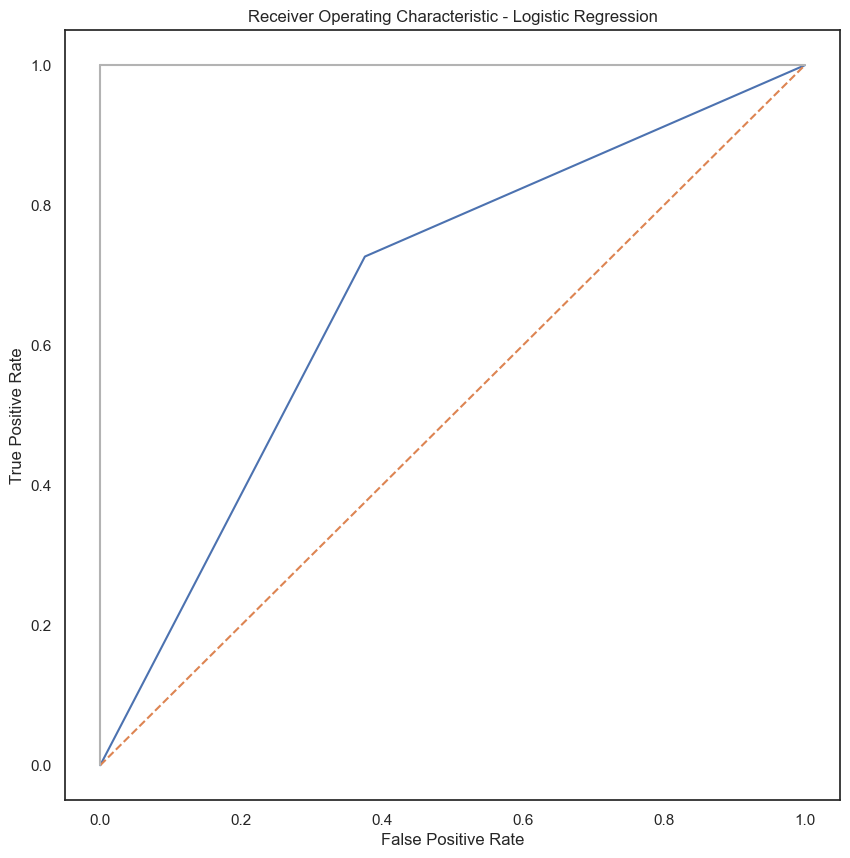

In [107]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()